In [1]:
import pandas as pd
from IPython.display import display

In [2]:
import numpy as np
import scipy.special
from bokeh.plotting import figure, output_notebook, show
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
output_notebook(hide_banner=True)
p1 = figure(title="Normal Distribution (μ=0, σ=0.5)",tools="save",
            background_fill_color="#E8DDCB")

mu, sigma = 0, 0.5

measured = np.random.normal(mu, sigma, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(-2, 2, 1000)
pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
cdf = (1+scipy.special.erf((x-mu)/np.sqrt(2*sigma**2)))/2

p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p1.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p1.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p1.legend.location = "top_left"
p1.xaxis.axis_label = 'x'
p1.yaxis.axis_label = 'Pr(x)'

In [3]:
show(p1)

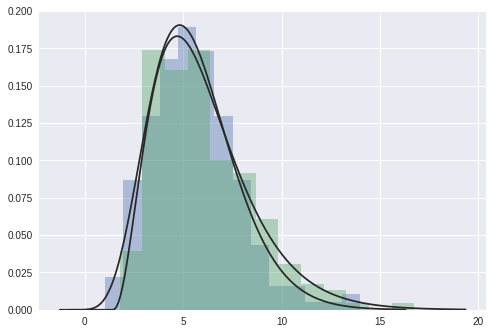

In [4]:
from numpy import cos, linspace
x = linspace(-6, 6, 100)
y = cos(x)

In [5]:
p = figure(width=500, height=500)
p.circle(x, y, size=7, color="firebrick", alpha=0.5)
show(p)

In [61]:
from bokeh.sampledata.autompg import autompg
from numpy import array

In [62]:
grouped = autompg.groupby("yr")
mpg = grouped["mpg"]
avg = mpg.mean()
std = mpg.std()
years = array(list(grouped.groups.keys()))
american = autompg[autompg["origin"]==1]
japanese = autompg[autompg["origin"]==3]
display(years)

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [63]:
p = figure()

p.quad(left=years-0.4, right=years+0.4, bottom=avg-std, top=avg+std, fill_alpha=0.2)

p.circle(x=japanese["yr"], y=japanese["mpg"], size=8,
         alpha=0.4, line_color="red", fill_color=None, line_width=2)

p.triangle(x=american["yr"], y=american["mpg"], size=8, 
           alpha=0.4, line_color="blue", fill_color=None, line_width=2)

show(p)

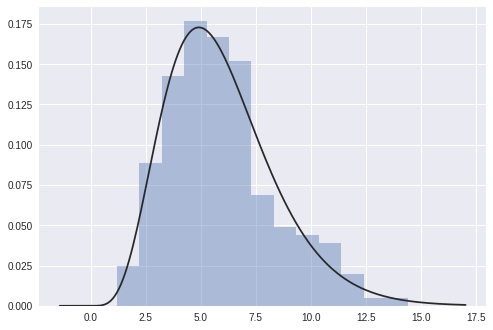

In [4]:
import seaborn as sns
from scipy import stats, integrate
import matplotlib.pyplot as plt
sns.set(color_codes=True)
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);
plt.show()

In [26]:
x

array([  2.02137391,   4.73593017,   7.22890824,   5.0802047 ,
         4.01810367,   6.5018785 ,   9.48336111,   3.25740898,
         8.69281064,   7.79097521,  14.42491222,   5.00483931,
         7.29760039,  10.47911459,   5.61888549,   4.67136637,
         4.57501086,   4.1447527 ,   5.91757133,   5.7715992 ,
         2.96113522,   4.46558533,   7.94956429,   6.87418532,
         6.49193141,   3.15237154,   7.4838058 ,   5.23668249,
         6.24236412,   4.54515559,   5.52027234,   6.39272229,
         5.92734103,   5.57124061,   6.71242846,   6.18605478,
         6.66432716,   7.3644211 ,   3.32347656,   1.93660074,
         3.10890673,   4.63071591,   3.78989326,   3.75634803,
         8.33140932,   8.21664051,   7.27094771,   7.49123431,
         5.19119915,   4.20714815,   4.92574352,   5.23402083,
         3.45225769,   6.47437282,   5.50564816,   4.51669026,
         3.41464045,   3.63148361,   9.42226864,   4.95335666,
         3.56195087,   3.65295252,   9.81438558,   2.09

In [44]:
import numpy as np

In [55]:
# ma = 33000000
# mi = 0
np.linspace(0, 33000000, 150, dtype=int)

array([       0,   221476,   442953,   664429,   885906,  1107382,
        1328859,  1550335,  1771812,  1993288,  2214765,  2436241,
        2657718,  2879194,  3100671,  3322147,  3543624,  3765100,
        3986577,  4208053,  4429530,  4651006,  4872483,  5093959,
        5315436,  5536912,  5758389,  5979865,  6201342,  6422818,
        6644295,  6865771,  7087248,  7308724,  7530201,  7751677,
        7973154,  8194630,  8416107,  8637583,  8859060,  9080536,
        9302013,  9523489,  9744966,  9966442, 10187919, 10409395,
       10630872, 10852348, 11073825, 11295302, 11516778, 11738255,
       11959731, 12181208, 12402684, 12624161, 12845637, 13067114,
       13288590, 13510067, 13731543, 13953020, 14174496, 14395973,
       14617449, 14838926, 15060402, 15281879, 15503355, 15724832,
       15946308, 16167785, 16389261, 16610738, 16832214, 17053691,
       17275167, 17496644, 17718120, 17939597, 18161073, 18382550,
       18604026, 18825503, 19046979, 19268456, 19489932, 19711

In [64]:
from bokeh.charts import Area, show, output_file, defaults
from bokeh.layouts import row

defaults.width = 400
defaults.height = 400

# create some example data
data = dict(
    python=[2, 3, 7, 5, 26, 221, 44, 233, 254, 265, 266, 267, 120, 111],
    pypy=[12, 33, 47, 15, 126, 121, 144, 233, 254, 225, 226, 267, 110, 130],
    jython=[22, 43, 10, 25, 26, 101, 114, 203, 194, 215, 201, 227, 139, 160],
)

area1 = Area(data, title="Area Chart", legend="top_left",
             xlabel='time', ylabel='memory')

area2 = Area(data, title="Stacked Area Chart", legend="top_left",
             stack=True, xlabel='time', ylabel='memory')

In [65]:
show(row(area1, area2))

In [96]:
american_mpgs = list(autompg[autompg.origin == 1]['mpg'].values)
europeran_mpgs = list(autompg[autompg.origin == 2]['mpg'].values)
japanese_mpgs = list(autompg[autompg.origin == 3]['mpg'].values)
# display()
s = min(len(american_mpgs), len(europeran_mpgs), len(japanese_mpgs))
american_mpgs = american_mpgs[: s]
europeran_mpgs = europeran_mpgs[: s]
japanese_mpgs = japanese_mpgs[ : s]

In [99]:
data = {
    'american': american_mpgs,
    'european': europeran_mpgs,
    'japanese': japanese_mpgs,
}
area = Area(data, title="Stacked Area Chart", legend="top_left",
             stack=True, xlabel='time', ylabel='milages')

In [100]:
show(area)

In [5]:
a = sns.load_dataset("iris")
display(a)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
import pandas as pd
from IPython.display import display
data = dict(
    python=[2, 3, 7, 5, 26, 221, 44, 233, 254, 265, 266, 267, 120, 111],
    pypy=[12, 33, 47, 15, 126, 121, 144, 233, 254, 225, 226, 267, 110, 130],
    jython=[22, 43, 10, 25, 26, 101, 114, 203, 194, 215, 201, 227, 139, 160],
)
df1 = pd.DataFrame(data)

In [4]:
display(df1)

,jython,pypy,python
0,22,12,2
1,43,33,3
2,10,47,7
3,25,15,5
4,26,126,26
5,101,121,221
6,114,144,44
7,203,233,233
8,194,254,254
9,215,225,265


In [5]:
data = dict(
    python=[2, 3, 7, 5, 26, 221, 44, 233, 254, 265, 266, 267, 120, 111],
    pypy=[12, 33, 47, 15, 126, 121, 144, 233, 254, 225, 226, 267, 110, 130],
    ironPython=[22, 43, 10, 25, 26, 101, 114, 203, 194, 215, 201, 227, 139, 160],
)
df2 = pd.DataFrame(data)

In [6]:
display(df2)

,ironPython,pypy,python
0,22,12,2
1,43,33,3
2,10,47,7
3,25,15,5
4,26,126,26
5,101,121,221
6,114,144,44
7,203,233,233
8,194,254,254
9,215,225,265


In [13]:
df1.merge(df2, 
          on=['python', 'pypy'], how='right')

,jython,pypy,python,ironPython
0,22,12,2,22
1,43,33,3,43
2,10,47,7,10
3,25,15,5,25
4,26,126,26,26
5,101,121,221,101
6,114,144,44,114
7,203,233,233,203
8,194,254,254,194
9,215,225,265,215


In [18]:
df2.rename(columns={"python": "py"}, inplace=True)

In [19]:
df2

,ironPython,pypy,py
0,22,12,2
1,43,33,3
2,10,47,7
3,25,15,5
4,26,126,26
5,101,121,221
6,114,144,44
7,203,233,233
8,194,254,254
9,215,225,265


In [4]:
a = [9, 5 ,6 ,11 ,8 ,5 ,7 ,13 ,12 ,13 ,9 ,8 ,10 ,6 ,11 ,9 ,7, 12]

In [6]:
g = pd.Series(a)

In [15]:
g.std(ddof=1)

2.6451336499586917

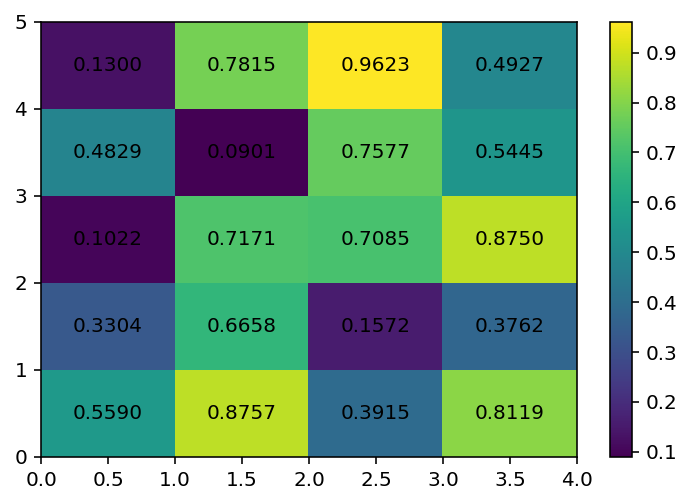

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'
data = np.random.rand(5, 4)
heatmap = plt.pcolor(data)

for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.4f' % data[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )

plt.colorbar(heatmap)

plt.show()